<a href="https://colab.research.google.com/github/Kunalsingh5j/Churn-rate-prediction/blob/main/Customer_Churn_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

##Importing the libraries and dataset

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

##Data Exploration

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
df.select_dtypes(include=['int64','float64']).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##Missing Value Treatment

In [ ]:
df.isnull().values.any()

False

##Dealing with Categorical Variables

In [ ]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
df.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


##One Hot Encoding

In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))
df = pd.get_dummies(data=df, drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


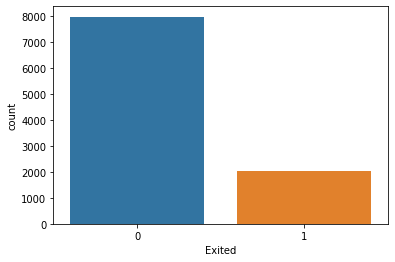

In [ ]:
sns.countplot(df['Exited'])

In [ ]:
(y==0).sum()

7963

In [ ]:
(y==1).sum()

2037

Correlation and Heatmap

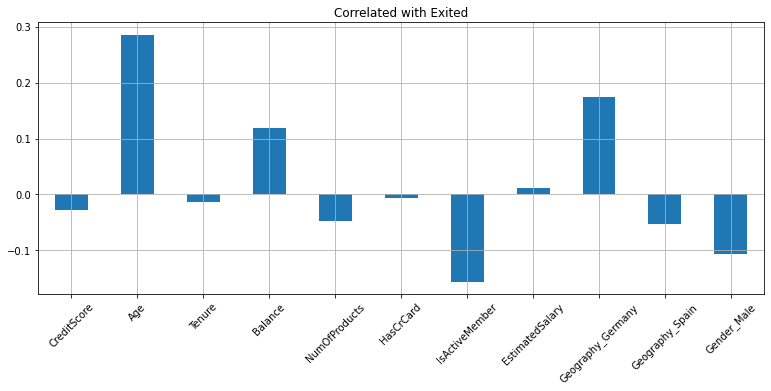

In [ ]:
df1=df.drop(columns='Exited')
df1.corrwith(df['Exited']).plot.bar(
    figsize=(13,5), title='Correlated with Exited', rot=45, grid=True
)

In [ ]:
corr=df.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


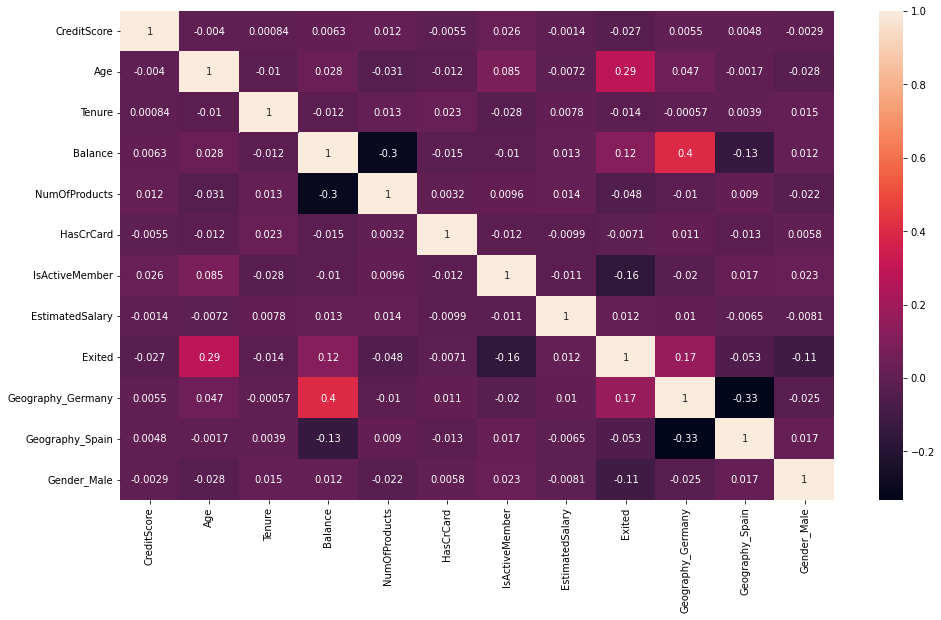

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

##Splitting the dataset

In [ ]:
X= df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [ ]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64

In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Part 2: Model Building

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier1.predict(X_test)

###Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc,f1,prec,rec]], columns=['model','accuracy','f1','precision','recall'])
results

,model,accuracy,f1,precision,recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1526,   69],
       [ 309,   96]])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier1,X=X_train,y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.84 %
Standard Deviation: 0.88 %


##Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2= RandomForestClassifier(n_estimators=10,criterion='gini')
classifier2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred=classifier2.predict(X_test)

###Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
results_1 = pd.DataFrame([['Random Forest', acc,f1,prec,rec]], columns=['model','accuracy','f1','precision','recall'])
results=results.append(results_1,ignore_index=True)
results

,model,accuracy,f1,precision,recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8645,0.600884,0.744526,0.503704


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1525,   70],
       [ 201,  204]])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.28 %
Standard Deviation: 0.96 %


##Xgboost Classification

In [ ]:
from xgboost import XGBClassifier
classifier3 = XGBClassifier()
classifier3.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred=classifier3.predict(X_test)

###Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
results_2 = pd.DataFrame([['XgBoost', acc,f1,prec,rec]], columns=['model','accuracy','f1','precision','recall'])
results=results.append(results_2,ignore_index=True)
results

,model,accuracy,f1,precision,recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8645,0.600884,0.744526,0.503704
2,XgBoost,0.8645,0.605531,0.737589,0.513580


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.82 %
Standard Deviation: 1.13 %


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1521,   74],
       [ 197,  208]])

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5 , 6, 7, 8 , 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]    
}


In [ ]:
random_search = RandomizedSearchCV(estimator=classifier3, param_distributions=parameters, n_iter=5, 
                                   scoring='roc_auc', n_jobs = -1, cv=10, verbose=3)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.2)

In [ ]:
random_search.best_score_

0.8629884600975737

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1}

#Final Model

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bytree=0.4, gamma=0.1, min_child_weight=5)
classifier.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.1, min_child_weight=5)

In [ ]:
y_pred=classifier.predict(X_test)

##Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
results_2 = pd.DataFrame([['Final Model', acc,f1,prec,rec]], columns=['model','accuracy','f1','precision','recall'])
results=results.append(results_2,ignore_index=True)
results

,model,accuracy,f1,precision,recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8645,0.600884,0.744526,0.503704
2,XgBoost,0.8645,0.605531,0.737589,0.513580
3,Final Model,0.8675,0.608567,0.757353,0.508642


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.02 %
Standard Deviation: 1.05 %


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1529,   66],
       [ 199,  206]])

#Single Value Prediction

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
single_obs = [[625,	45,	5,	12500.01,	1,	0,	1,	101348.88, 0,	0, 1]]

In [ ]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])